In [1]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

In [32]:
# Use cv2 to read the images, convert them to RGB and out in numpy array

data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes):
    path = "Train/{0}/".format(i)
    #print(path)
    Class=os.listdir(path)
    
    for a in Class:
        try:
            image = cv2.imread(path+a)
            image_from_array = Image.fromarray(image,"RGB")
            size_image = image_from_array.resize((height,width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            pass

Cells = np.array(data) # Array of train images data
labels=np.array(labels) # Array of label image data

print(Cells.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


In [44]:
# Randomize the order of the input images

s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]
              

(39209, 30, 30, 3)

In [46]:
# Splitting train and validation dataset in 80% and 20% respectively
(X_train, X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]

X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255

(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

# Conduct one hot encoding for this classification
from keras.utils import to_categorical
y_train = to_categorical(y_train,43)
y_val = to_categorical(y_val,43)

In [48]:
# Define the layers of the model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
__________

In [49]:
# Trainning model

epochs = 20
result = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 31368 samples, validate on 7841 samples
Epoch 1/20
31368/31368 [==============================] - 64s 2ms/step - loss: 1.2183 - acc: 0.6501 - val_loss: 0.1905 - val_acc: 0.9491
Epoch 2/20
31368/31368 [==============================] - 56s 2ms/step - loss: 0.2748 - acc: 0.9128 - val_loss: 0.0926 - val_acc: 0.9736
Epoch 3/20
31368/31368 [==============================] - 61s 2ms/step - loss: 0.1737 - acc: 0.9466 - val_loss: 0.0575 - val_acc: 0.9850
Epoch 4/20
31368/31368 [==============================] - 51s 2ms/step - loss: 0.1309 - acc: 0.9598 - val_loss: 0.0539 - val_acc: 0.9839
Epoch 5/20
31368/31368 [==============================] - 54s 2ms/step - loss: 0.1123 - acc: 0.9657 - val_loss: 0.0417 - val_acc: 0.9892
Epoch 6/20
31368/31368 [==============================] - 62s 2ms/step - loss: 0.0963 - acc: 0.9708 - val_loss: 0.0395 - val_acc: 0.9888
Epoch 7/20
31368/31368 [==============================] - 67s 2ms/step - loss: 0.

In [50]:
model.save("Traffic_sign_recognition.h5")

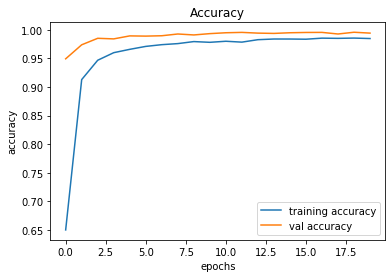

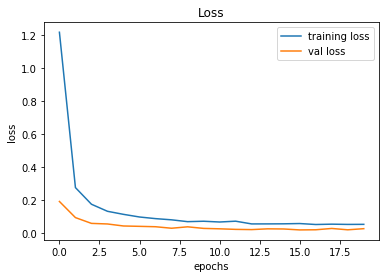

In [52]:
plt.figure(0)
plt.plot(result.history['acc'], label='training accuracy')
plt.plot(result.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(result.history['loss'], label='training loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [62]:
# Evaluate our model with Test data
y_test = pd.read_csv("Test.csv")
y_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [63]:
labels=y_test["Path"].as_matrix()
y_test = y_test["ClassId"].values

data=[]
for f in labels:
    image=cv2.imread(f)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

len(data)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


12630

In [64]:
X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9686460807600951

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        60
           1       0.95      1.00      0.97       720
           2       0.99      0.98      0.99       750
           3       0.96      0.94      0.95       450
           4       0.99      0.99      0.99       660
           5       0.92      0.99      0.95       630
           6       0.97      0.76      0.85       150
           7       0.99      0.94      0.97       450
           8       0.96      0.96      0.96       450
           9       0.96      1.00      0.98       480
          10       1.00      0.99      1.00       660
          11       0.94      0.98      0.96       420
          12       1.00      0.97      0.98       690
          13       0.98      1.00      0.99       720
          14       0.99      1.00      1.00       270
          15       0.94      1.00      0.97       210
          16       0.97      0.99      0.98       150
          17       1.00    